# Part I - Prosper Loan Data Exploration
## Truong Quang Minh Tu

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [39]:
# set full columns for easily view
pd.set_option("display.max_columns", None)

In [40]:
# load data
data = pd.read_csv(r'C:\Users\DE\Desktop\Data visualization_Udacity\prosperLoanData.csv')

**Since there are many fields that are numeric and only applicable for loans after July 2009 so that we filter to get only this subset data to make the research more convincing**

In [41]:
# rechange the column ListingCreationDate into datetime to filter loans after July 2009.
data['ListingCreationDate'] = pd.to_datetime(data['ListingCreationDate'])
# data = data.loc[data['ListingCreationDate'] >= '2009-07-01']

**Drop column CreditGrade as it is only applicable for loans pre 2009 period**

In [42]:
# drop columns CreditGrade
data.drop('CreditGrade', axis=1, inplace=True);

In [43]:
data.shape

(113937, 80)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   Term                                 113937 non-null  int64         
 4   LoanStatus                           113937 non-null  object        
 5   ClosedDate                           55089 non-null   object        
 6   BorrowerAPR                          113912 non-null  float64       
 7   BorrowerRate                         113937 non-null  float64       
 8   LenderYield                          113937 non-null  float64       
 9   EstimatedEffectiveYield              84853 non-null   float64       
 

In [45]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44

### What is the structure of your dataset?

The dataset contains 113937 loans with 81 variables corresponding to each loan including loan amount, payment, interest rate. Most of the columns are numeric data (indicate loan, interest, fee amount...), categorical data (Occupation, Loan Status...) and ordinal data (CreditGrade, LoanStatus...).

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset is to find out what variables highly correlate with the 2 followings: 
- The amount prosper loan 
- The amount proper loan loss - The principal that remains uncollected after any recoveries.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features will help support support my investigation is Prosper Loan Amount and the Prosper Loss Net, which are also the feature of interest. In order to make an investigation, the both could be explained by the other variables.

## Univariate Exploration

In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.




In [46]:
from pandas.api.types import is_numeric_dtype

<Figure size 1440x576 with 0 Axes>

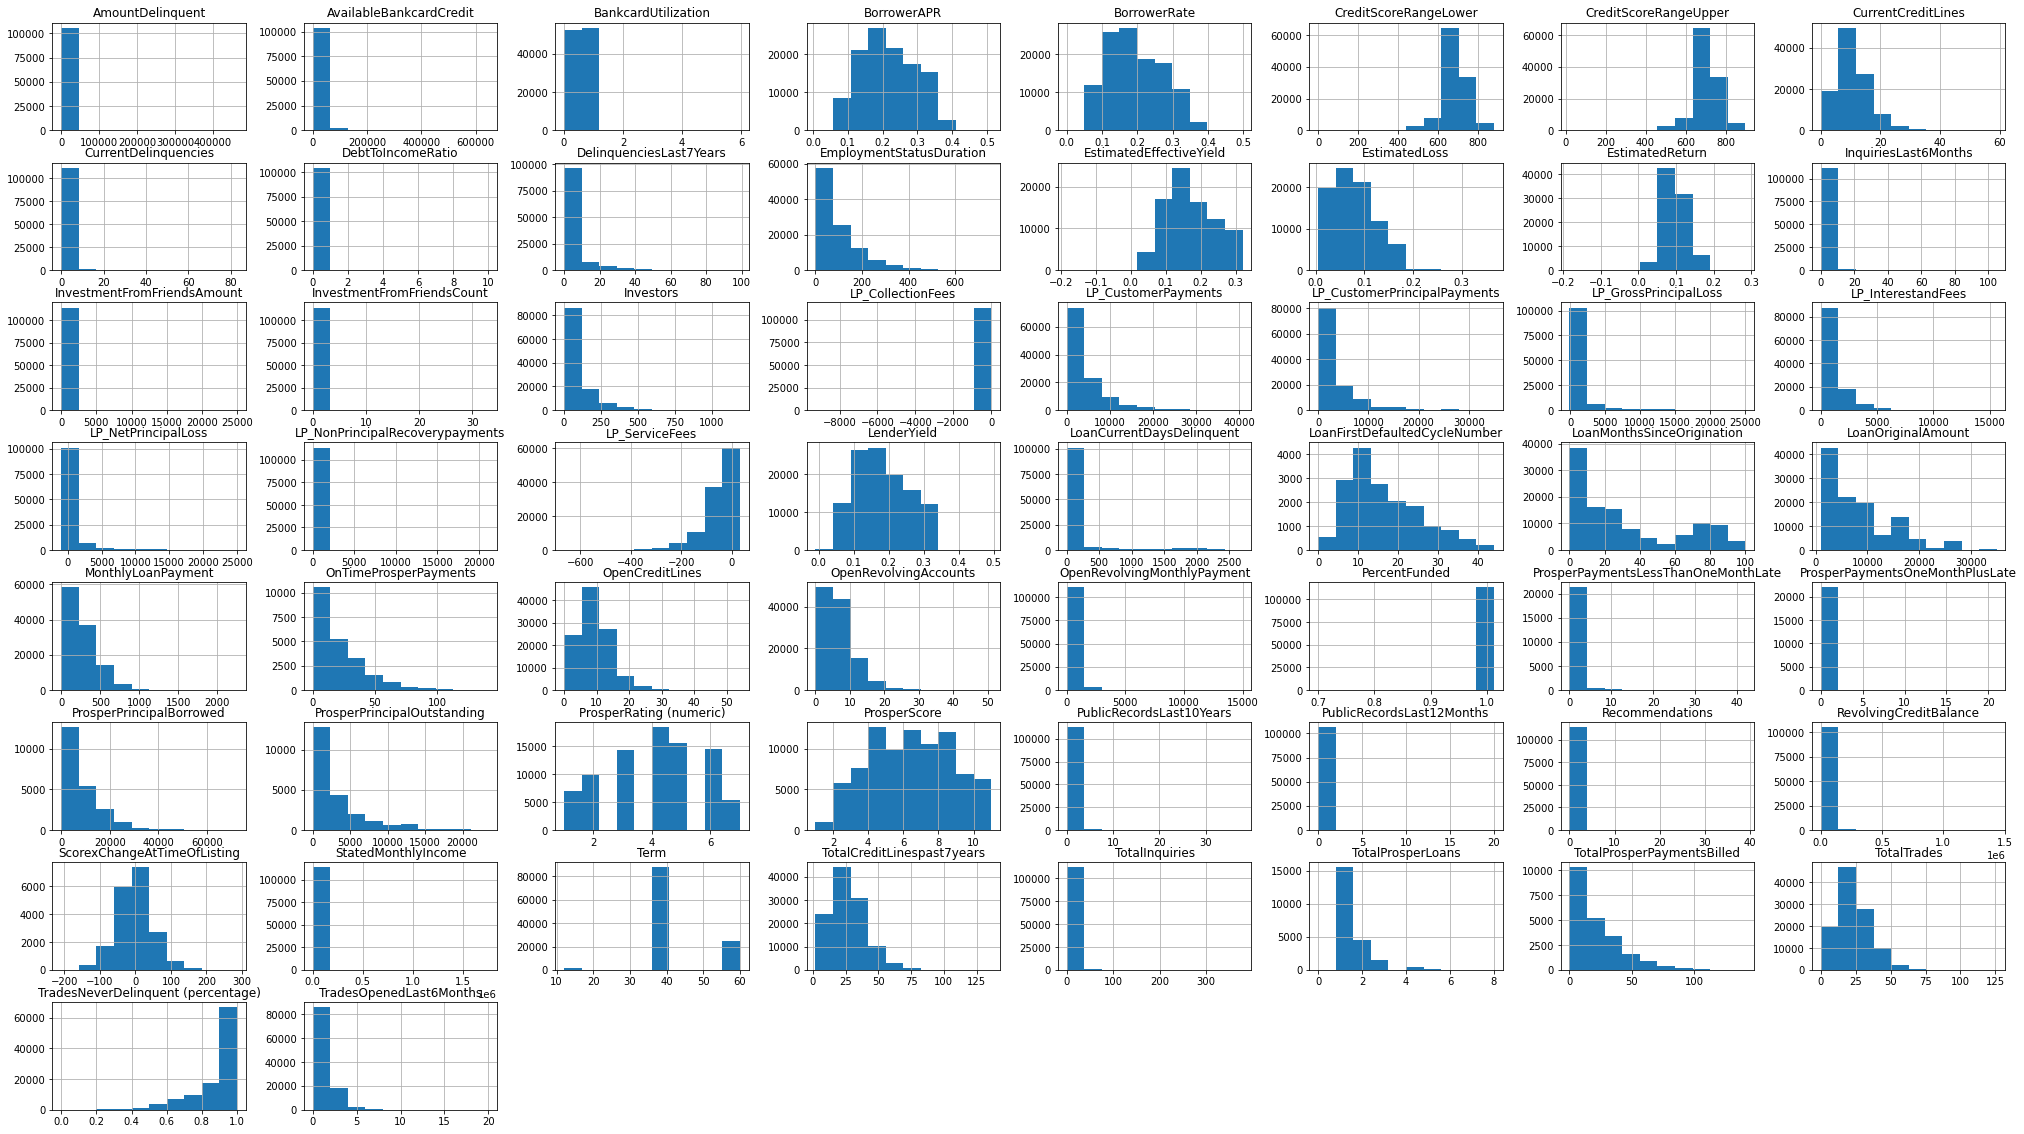

In [47]:
# describe all numeric columns apart from columns describe ID as an overview
plt.figure(figsize = (20,8))
data.hist(column = [x for x in data.columns.difference(['ListingKey','ListingNumber', 'ListingCreationDate', 'ListingCategory (numeric)', 'LoanKey', 'LoanNumber']) if is_numeric_dtype(data[x]) == True],
figsize=(35,20));


The term = 36 attracts the most borrowers which account for the most number of listing in the whole dataset.

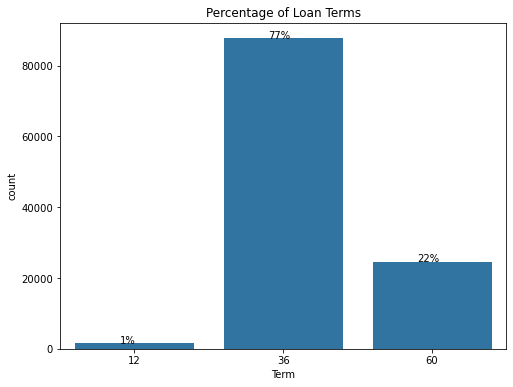

In [48]:
# plot to see which terms account for the most in total loans
plt.figure(figsize = (8,6)) 
base_color = sb.color_palette()[0]
total = data.shape[0]
ax = sb.countplot(data=data, x='Term', color=base_color)
plt.title('Percentage of Loan Terms')
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_height() + 10
    ax.text(x, y, percentage)


A new insight is that the number of loan listings lies most under income range of $25,000 - 49,999 

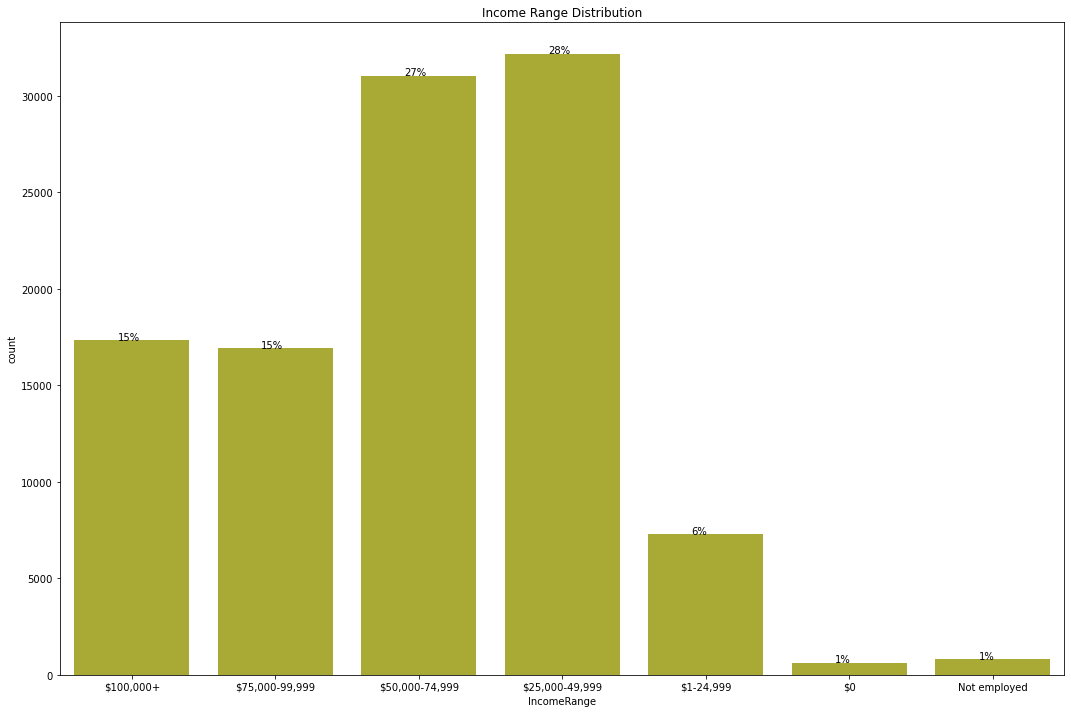

In [49]:
# plot to see the Income Range Distribution
# reorder category
order = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed']
salary_classes = pd.api.types.CategoricalDtype(ordered=True, categories=order)
data['IncomeRange'] = data['IncomeRange'].astype(salary_classes);

# plot chart
plt.figure(figsize = (18,12)) 
base_color = sb.color_palette()[8]
ax=sb.countplot(data=data, x='IncomeRange', color = base_color, order=data['IncomeRange'].cat.categories)
plt.title('Income Range Distribution')

# insert data labels
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_height() + 10
    ax.text(x, y, percentage)




The Loan Status Distribution shows that the dataset state for the bank loan in general is in the normal state as the loan status accounts the most in completed status and current status. Thus, there is no exceptional situation that the data is collected, then, analysis for the data loan prosper will be more reliable.

Text(0.5, 1.0, 'Loan Status Distribution')

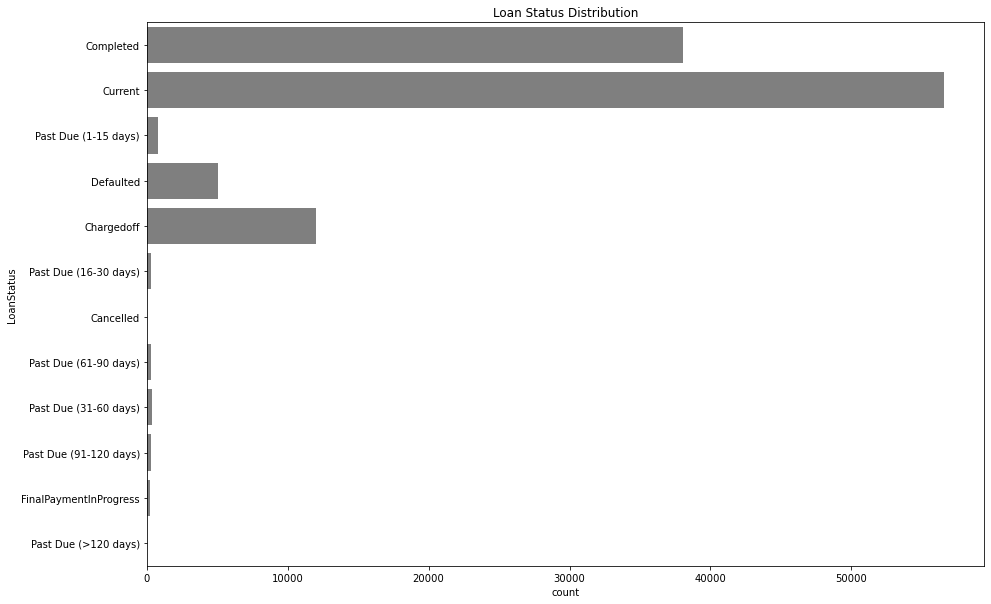

In [50]:
# Detect Loan Status
# reorder category
# plot chart
plt.figure(figsize = (15,10)) 
base_color = sb.color_palette()[7]
ax=sb.countplot(data=data, y='LoanStatus', color = base_color)
plt.title('Loan Status Distribution')


The Prosper Loan Distribution follows normal distribution and has its mean = 0, which is also a good sign that the net return after recoveries for charged off loans still offset the loss for some charged off loan amount.

c:\Users\DE\Anaconda3\envs\data_wrangling\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


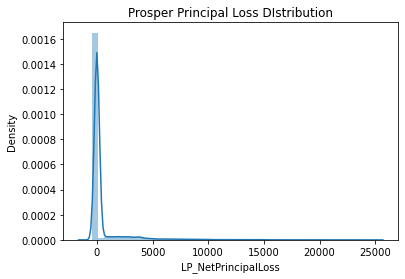

In [97]:
# Prove Prosper Score as Normal distribution
sb.distplot(data['LP_NetPrincipalLoss'].loc[data['LP_NetPrincipalLoss'].isnull() == False], kde=True);
plt.title('Prosper Principal Loss DIstribution');


Loan original amount and Prosper Loan Principal Outstanding density: 
- Loan original is multimodal data for it contains different aspects and contexts for each mode in the data. 
- Prosper Loan Principal is right skew as the nature of loan is, the higher amount of loan prosper, the less number of loan listings.


c:\Users\DE\Anaconda3\envs\data_wrangling\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\DE\Anaconda3\envs\data_wrangling\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


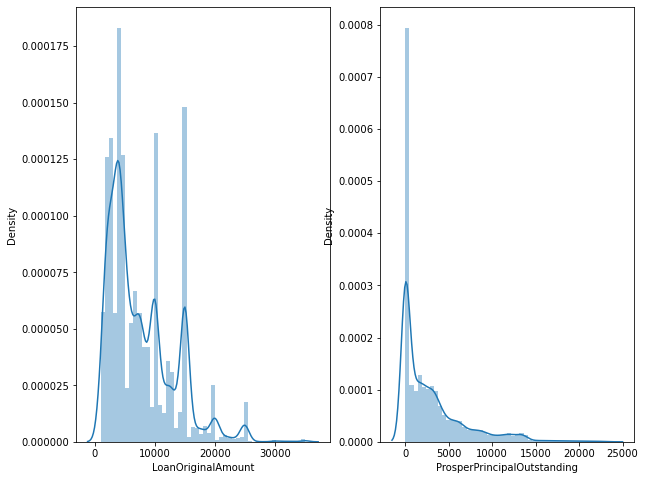

In [98]:
# multimodal loan amount distribution
plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2);
sb.distplot(data['LoanOriginalAmount'].loc[data['ProsperPrincipalOutstanding'].isnull() == False], kde=True, ax=ax1);
sb.distplot(data['ProsperPrincipalOutstanding'].loc[data['ProsperPrincipalOutstanding'].isnull() == False], kde=True, ax=ax2);


The monthly payment is right skew as it only focus on the payment with the low amount, then with the higher amount, the density will be low.

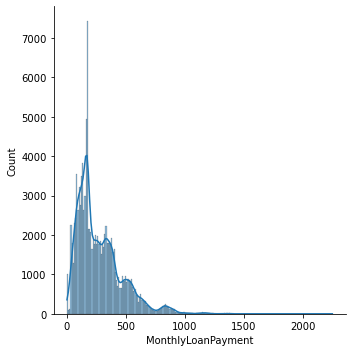

In [86]:
#Monthly Loan Payment Density
sb.displot(data['MonthlyLoanPayment'], kde=True);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As discover data above, there seems no unusual point that data need to be transformed again, one reason is that data is already structured and clean, any missing data could be explained logically. 
As the research key is to find out what variables correlate with the prosper loan amount. The proper loan amount density distribution is right skew, which is reasonable that the loan amount is high, which will constraint the number of loan listings. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Base on the data, need to track again the prosper loan as it is not normal distribution, for the prosper loan will be null if the borrower does not have any prior loans which can not display a normal chart. For researching purpose, we need to exclude null values from the data to get the prosper loan as normal distribution.

Another unusual point in the data is that the field Loan Origin Amount does not follow normal distribution which makes the analysis is harder. One explanation is that the data spans different types and contexts. For the data in this column does not contain any null values, no need for any further data cleaning.

## Bivariate Exploration

- Explore the correlation between the Prosper Rating and Prosper Principal Outstanding.
- Explore the correlation between the Loss amount of Prosper Loan and the Prosper Loan itself.

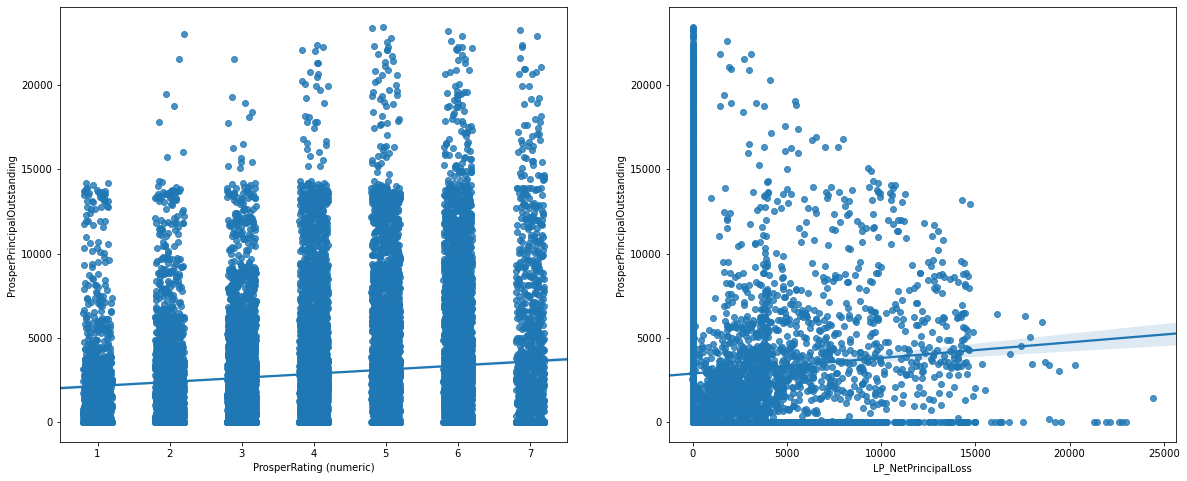

In [61]:
# create fig and add subplots 
fig = plt.figure(figsize = (20,8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

# plot the chart
sb.regplot(data=data, x='ProsperRating (numeric)', y='ProsperPrincipalOutstanding', truncate=False, x_jitter=0.2,ax=ax1);
sb.regplot(data=data, x='LP_NetPrincipalLoss', y='ProsperPrincipalOutstanding', truncate=False, x_jitter=0.2, ax=ax2);


- The greater the number of prosper rating is, the less on density of the loss on prosper loan.
- The loss on prosper loan seems appear more at prosper rating (3,4,5), for this group is not so good and not so bad, the amount of loan is high, thus leads to the group is also high. 

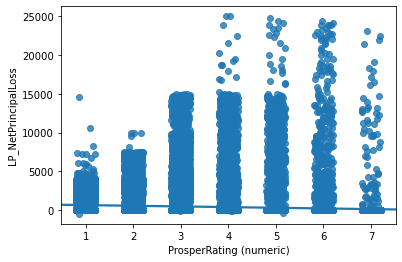

In [65]:
sb.regplot(data=data, x='ProsperRating (numeric)', y='LP_NetPrincipalLoss', truncate=False, x_jitter=0.2);

- There seems to appear a clear difference in distribution on the prosper loan across the income range. The $50,000 - 74,999 income range observes the most loan number in total.

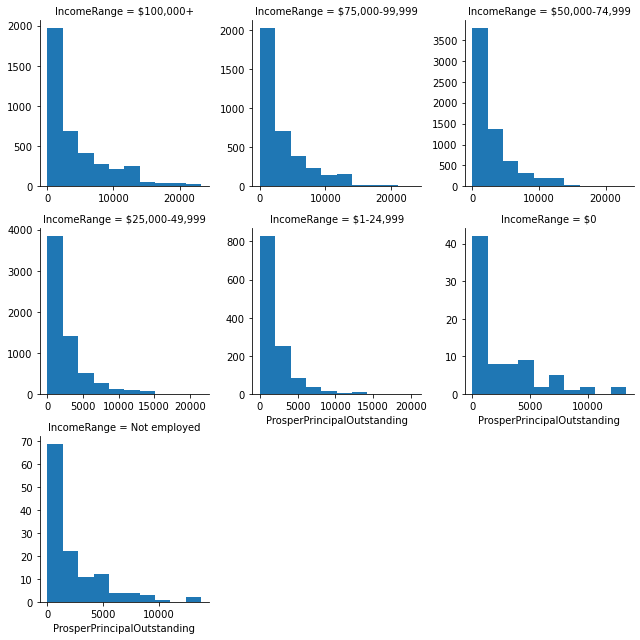

In [69]:
g = sb.FacetGrid(data = data, col = 'IncomeRange', col_wrap=3, sharey=False, sharex=False)

g.map(plt.hist, 'ProsperPrincipalOutstanding');


- Out of the listing category, the listing category = 1 (1 - Debt Consolidation) is the category that observes the most loan amount in the range 0-10000.

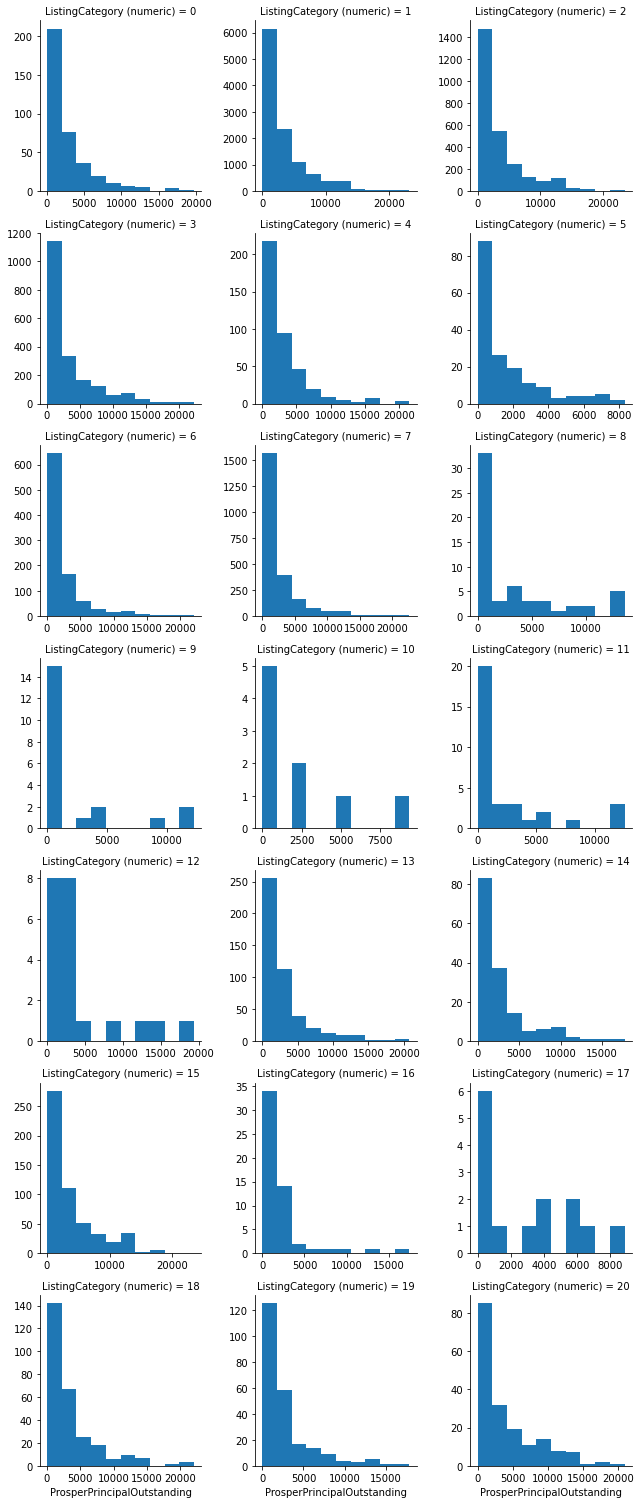

In [68]:
# find out wich category the prosper loan takes place the most
g = sb.FacetGrid(data = data, col = 'ListingCategory (numeric)', col_wrap=3, sharey=False, sharex=False)
g.map(plt.hist, 'ProsperPrincipalOutstanding');


- The lost on prosper loan appear the most in listing category = 1 (1 - Debt Consolidation) as well.

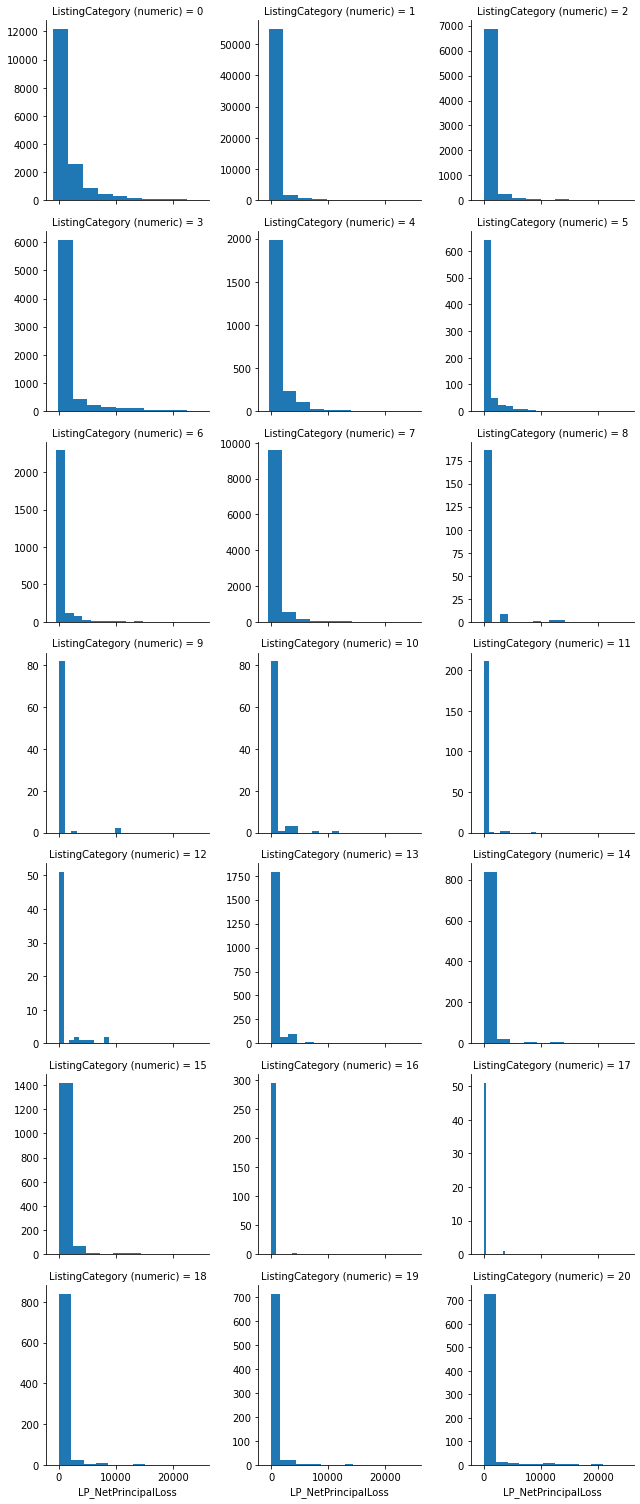

In [66]:
g = sb.FacetGrid(data = data, col = 'ListingCategory (numeric)', col_wrap=3, sharey=False)
g.map(plt.hist, 'LP_NetPrincipalLoss');

The term = 60 attracts observes the largest amount of prosper principal outstanding, for the longer term, the amount of the principal outstanding would be higher, we will explore the relationship between term and the interest rate.

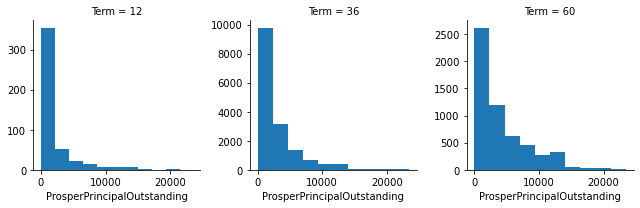

In [67]:
g = sb.FacetGrid(data = data, col = 'Term', col_wrap=3, sharey=False)
g.map(plt.hist, 'ProsperPrincipalOutstanding');

- We can see that the term = 36 observes the widest Borrower Rate, as explained in the univariate analysis, this terms accounts for the hihgest number of loan listings and the term = 60 observes the most favorable borrower rate in its IQR. As explained, longer term would be for higher loan amount, the prosper rating would be high. We will check in the multivariate analysis for term, borrower rate and prosper rating for their relation.

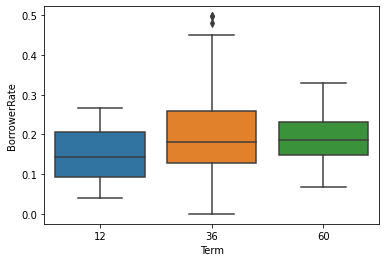

In [76]:
sb.boxplot(data=data, y ='BorrowerRate', x='Term');


## Multivariate Exploration

- Continuing analysis stated in the Bivariate Exploration for multivariate analysis for term, borrower rate and prosper rating for their relation, we can see that in the proper rating = 7, the borrower rate would be lower, expecially in the term = 60. This finding supports the hypothesis above explained why the prosper principal outstanding would be the largest in the term = 60.

c:\Users\DE\Anaconda3\envs\data_wrangling\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


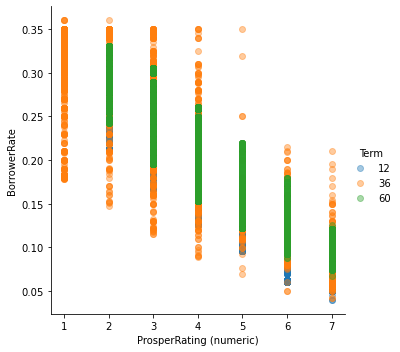

In [110]:
g = sb.FacetGrid(data = data, hue = 'Term', size = 5);
g.map(plt.scatter, 'ProsperRating (numeric)','BorrowerRate', alpha=0.4);

g.add_legend();



More analysis on the Income Range, the lowest income does not observe the the term loan = 12 and 36.

<AxesSubplot:xlabel='IncomeRange', ylabel='ProsperPrincipalOutstanding'>

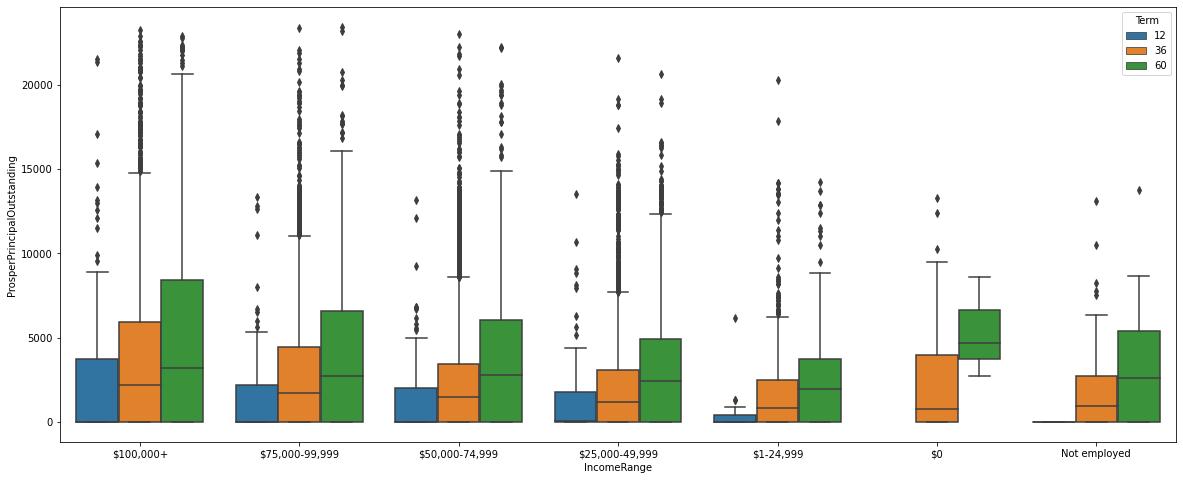

In [103]:
plt.figure(figsize = (20,8))
sb.boxplot(data=data, x="IncomeRange", y="ProsperPrincipalOutstanding", hue="Term")

## Conclusions

Summary for key findings:
- The Loan Prosper Principal Outstanding will be best explained by variables: Term, Prosper Rating, Borrower Rate. These 3 variables have a positive relationship with the Loan Prosper Principal Outstanding as these three are higher in value, the Principal Outstanding will be higher. 
- The Net Loss on Prosper Loan has its mean = 0 then the recoveries (negative Net Loss on Prosper Loan) could set off the charged off loans which are loss (positive Net Loss on Prosper Loan).
- Out of the listing category, the listing category = 1 (1 - Debt Consolidation) is the category that observes the most loan amount in the range 0-10000, and the lost on prosper loan appear the most in listing category = 1 (1 - Debt Consolidation) as well.

In [115]:
# convert into pdf 

from nb_offline_convert import OfflineHTMLExporter, OfflineWebPDFExporter

# convert to html
html_converter = OfflineHTMLExporter()
content, _ = html_converter.from_filename('Part_I_exploration_template.ipynb')
with open(r"Part_I_exploration_template.html", "w", encoding = 'utf-8') as f:
    f.write(content)